# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single DataFrame
mouse_study_combined_df = pd.merge(study_results, mouse_metadata, how='outer', on='Mouse ID')

# Display the data table for preview
mouse_study_combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [2]:
# Checking the number of mice.
#unique_count = mouse_study_combined_df['Mouse ID"].nunique()

unique_values = mouse_study_combined_df['Mouse ID'].unique()
unique_count = len(unique_values)
print(unique_count)                                      
                                

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

mouseid_timepoint_duplicates_df = mouse_study_combined_df[
    mouse_study_combined_df.duplicated]
                                                                                                   
mouseid_timepoint_duplicates_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
587,g989,0,45.0,0,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
g989_rows = mouse_study_combined_df[mouse_study_combined_df['Mouse ID'] == 'g989']
g989_rows.head(15)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
586,g989,0,45.000000,0,Propriva,Female,21,26
587,g989,0,45.000000,0,Propriva,Female,21,26
588,g989,5,48.786801,0,Propriva,Female,21,26
589,g989,5,47.570392,0,Propriva,Female,21,26
590,g989,10,51.745156,0,Propriva,Female,21,26
591,g989,10,49.880528,0,Propriva,Female,21,26
592,g989,15,51.325852,1,Propriva,Female,21,26
593,g989,15,53.442020,0,Propriva,Female,21,26
594,g989,20,55.326122,1,Propriva,Female,21,26
595,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_id_to_delete = 'g989'
mouse_study_combined_clean_df = mouse_study_combined_df[mouse_study_combined_df['Mouse ID'] != mouse_id_to_delete]
mouse_study_combined_clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_values = mouse_study_combined_clean_df['Mouse ID'].unique()
unique_count = len(unique_values)
print(unique_count)    

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

grouped_stats = mouse_study_combined_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
grouped_stats.columns = [
    'Mean Tumor Volume', 
    'Median Tumor Volume', 
    'Tumor Volume Variance', 
    'Tumor Volume Std. Dev.', 
    'Tumor Volume Std. Err.']

grouped_stats.head(15)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

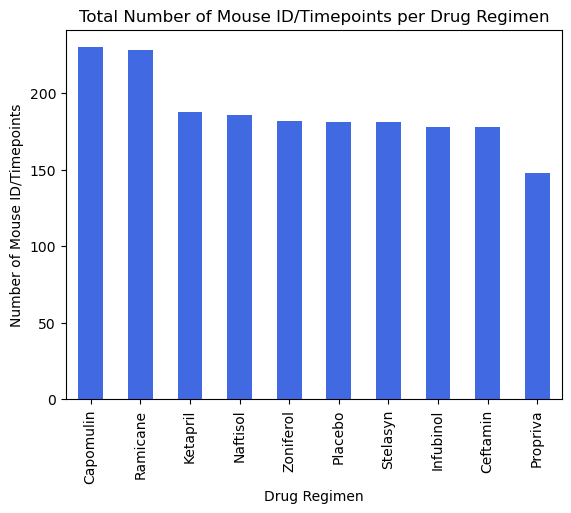

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_regimen_counts = mouse_study_combined_clean_df["Drug Regimen"].value_counts()
drug_regimen_counts.plot(kind='bar', color='royalblue', title="Total Number of Mouse ID/Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse ID/Timepoints")
plt.show()

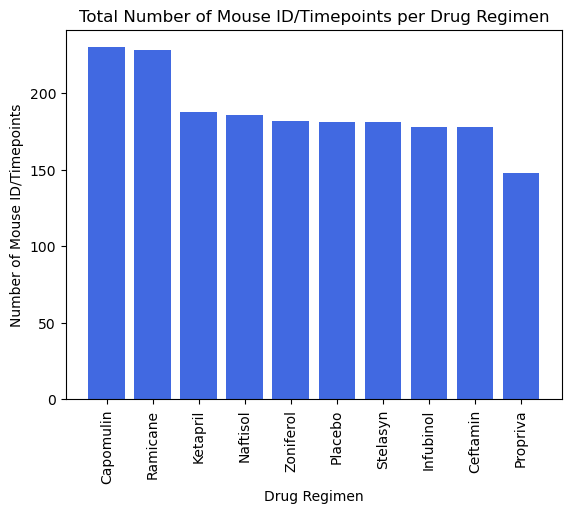

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = np.arange(len(drug_regimen_counts))
tick_locations = x_axis
plt.bar(x_axis, drug_regimen_counts.values, color='royalblue')
plt.title("Total Number of Mouse ID/Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse ID/Timepoints")
plt.xticks(tick_locations, drug_regimen_counts.index, rotation="vertical")
plt.show()

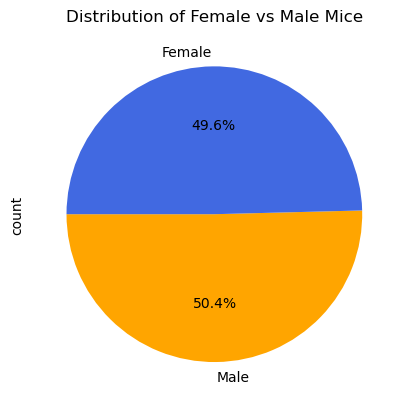

In [14]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
#sex_distribution = mouse_study_combined_clean_df(subset="Mouse ID")["Sex"].value_counts()
sex_distribution = mouse_study_combined_clean_df.drop_duplicates(subset="Mouse ID")["Sex"].value_counts()
sex_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=180, colors=['orange', 'royalblue'])

# Make the pie chart
plt.title("Distribution of Female vs Male Mice")
plt.show()

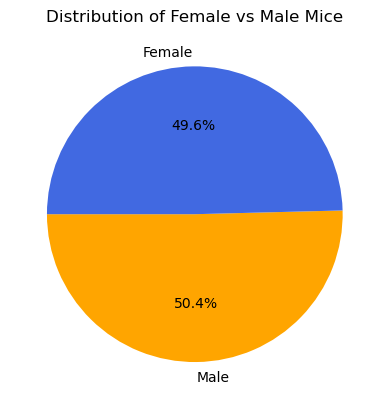

In [15]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%', startangle=180, colors=['orange', 'royalblue'])

# Make the pie chart
plt.title("Distribution of Female vs Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = mouse_study_combined_clean_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volumes = pd.merge(max_timepoints,  mouse_study_combined_clean_df, on=["Mouse ID", "Timepoint"])

print(final_tumor_volumes.head())

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     a203         45           67.973419                 2    Infubinol   
1     a251         45           65.525743                 1    Infubinol   
2     a262         45           70.717621                 4      Placebo   
3     a275         45           62.999356                 3     Ceftamin   
4     a366         30           63.440686                 1     Stelasyn   

      Sex  Age_months  Weight (g)  
0  Female          20          23  
1  Female          21          25  
2  Female          17          29  
3  Female          20          28  
4  Female          16          29  


In [24]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

for drug in treatment_regimens:
    final_volumes = final_tumor_volumes[final_tumor_volumes["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    tumor_volume_data.append(final_volumes)

print(tumor_volume_data[0].head()) 

# Calculate the IQR and quantitatively determine if there are any potential outliers.

    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    # Determine outliers using upper and lower bounds
outliers = {}
for i, drug in enumerate(treatment_regimens):
    volumes = tumor_volume_data[i]
    quartiles = volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    print(f"{drug} Regimen:")
    print(f"Lower Quartile: {lowerq}")
    print(f"Upper Quartile: {upperq}")
    print(f"Interquartile Range (IQR): {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Outliers: {outliers[drug]}")
    print("-" * 40)
    

19    38.982878
24    38.939633
61    30.485985
64    37.074024
66    40.159220
Name: Tumor Volume (mm3), dtype: float64
dict_keys([])
Capomulin Regimen:
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
Interquartile Range (IQR): 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549


KeyError: 'Capomulin'

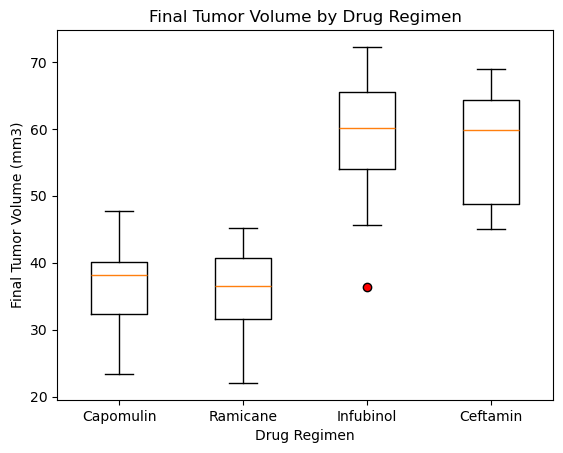

In [18]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig, ax = plt.subplots()

ax.boxplot(tumor_volume_data, labels=treatment_regimens, flierprops=dict(markerfacecolor='r', marker='o'))
ax.set_title('Final Tumor Volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

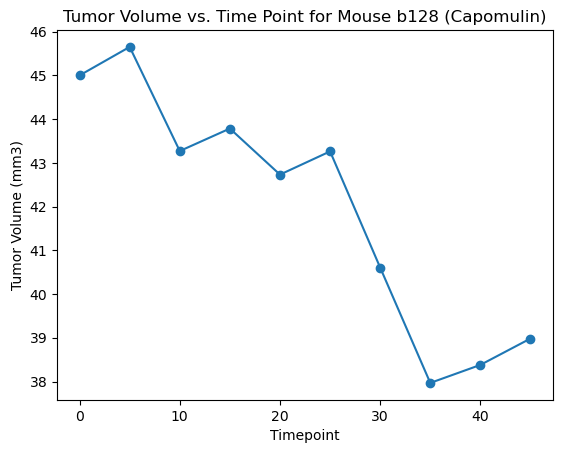

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_mouse = mouse_study_combined_clean_df[mouse_study_combined_clean_df["Drug Regimen"] == "Capomulin"].iloc[0]["Mouse ID"]

capomulin_mouse_data = mouse_study_combined_clean_df[(mouse_study_combined_clean_df["Mouse ID"] == capomulin_mouse) & (mouse_study_combined_clean_df["Drug Regimen"] == "Capomulin")]

plt.plot(capomulin_mouse_data["Timepoint"], capomulin_mouse_data["Tumor Volume (mm3)"], marker='o')
plt.title(f"Tumor Volume vs. Time Point for Mouse {capomulin_mouse} (Capomulin)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

In [20]:
#print(mouse_study_combined_clean_df)

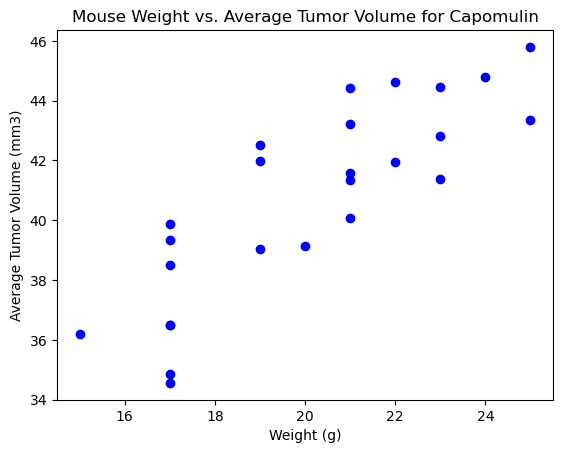

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_df = mouse_study_combined_clean_df[mouse_study_combined_clean_df['Drug Regimen'] == 'Capomulin']

# Group by 'Mouse ID' and calculate the average of 'Tumor Volume (mm3)' and 'Weight (g)'
capomulin_avg_volume_weight_df = capomulin_df.groupby('Mouse ID').agg({
    'Tumor Volume (mm3)': 'mean',
    'Weight (g)': 'mean'
}).reset_index()

# Plot the scatter plot
plt.scatter(capomulin_avg_volume_weight_df['Weight (g)'], capomulin_avg_volume_weight_df['Tumor Volume (mm3)'], color='blue')

# Add titles and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.8419363424694722


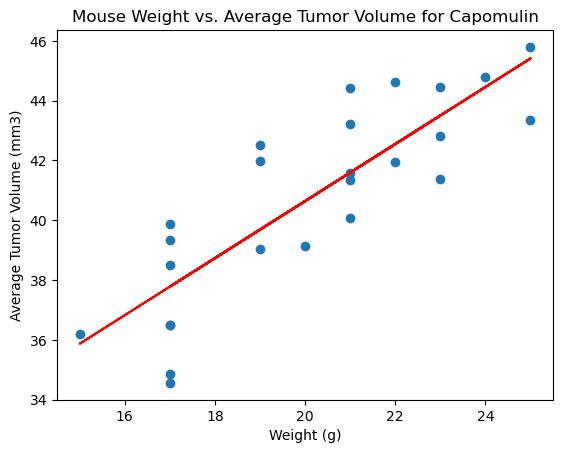

In [22]:
# Calculate the correlation coefficient and a linear regression model

# for mouse weight and average observed tumor volume for the entire Capomulin regimen

x_values = capomulin_avg_volume_weight_df['Weight (g)']
y_values = capomulin_avg_volume_weight_df['Tumor Volume (mm3)']

correlation_coefficient = x_values.corr(y_values)
print(f'Correlation Coefficient: {correlation_coefficient}')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
